In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action= 'ignore')

In [2]:
data = pd.read_csv("nyc_taxi_trip_duration.csv")

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
data.shape

(729322, 11)

In [5]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

- There are no null values in this Dataset.

In [6]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:
import datetime as dt

In [9]:
data['pickup_datetime']= pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']= pd.to_datetime(data['dropoff_datetime'])

# Adding more colums to the dataset for better insights

In [10]:
data['weekday'] = data.pickup_datetime.dt.weekday
data['pickup_hour'] = data.pickup_datetime.dt.hour
data['month'] = data.pickup_datetime.dt.month

In [11]:
from haversine import haversine

In [12]:
def cal_dist(df):
    pickup = (df['pickup_longitude'], df['pickup_latitude'])
    dropoff = (df['dropoff_longitude'],df['dropoff_latitude'])
    return haversine(pickup,dropoff)

In [13]:
data['distance'] = data.apply(lambda x : cal_dist(x), axis=1)
data['speed'] = (data.distance/(data.trip_duration/3600))

In [14]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'weekday', 'pickup_hour', 'month', 'distance',
       'speed'],
      dtype='object')

In [15]:
print(data.shape)

(729322, 16)


# Univariate Analysis

# Number of Passengers

In [16]:
data.passenger_count.value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

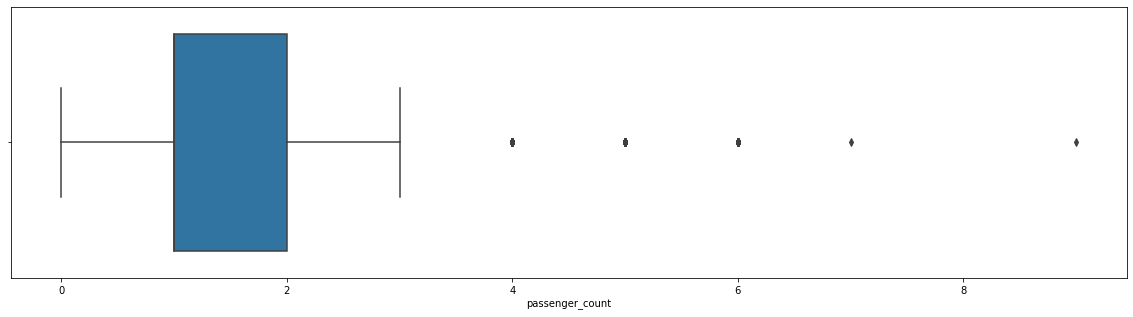

In [17]:
plt.figure(figsize=(20,5))
sns.boxplot(data.passenger_count)
plt.show()

# Observations:
- maximum number of trips consists of 1 or 2 passengers.
- there are trips having 0 passengers as well.
- there are trips for passenger counts 7 and 9 which is absurd so we will ignore them for now.

In [18]:
data.passenger_count.describe()

count    729322.000000
mean          1.662055
std           1.312446
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: passenger_count, dtype: float64

- Since mean = 1, so we can replace 0 passenger values with 1

In [19]:
data['passenger_count'] = data.passenger_count.apply(lambda x : 1 if x==0 else x)

- Now we remove the outliers

In [20]:
data = data[data.passenger_count <7]

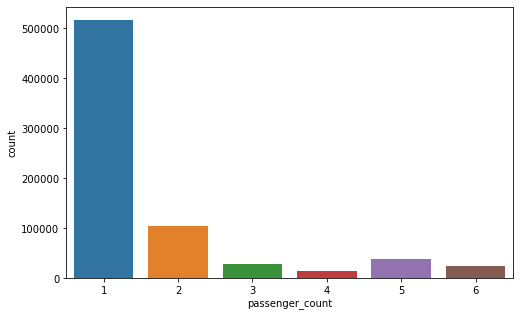

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data.passenger_count)
plt.show()

# Trips per hour

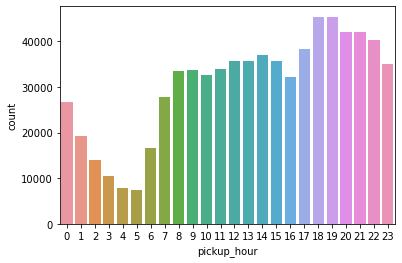

In [22]:
sns.countplot(data.pickup_hour)
plt.show()

- we see that maximum number of taxi pickups occur in the evening between 6pm to 7pm and start declining as the night falls.

# Trips per Weekday 

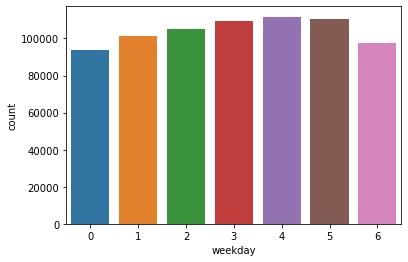

In [23]:
sns.countplot(data.weekday)
plt.show()

- we observe that number of trips increase from monday till friday and then decrease significantly from saturday to sunday.

# Trips per month

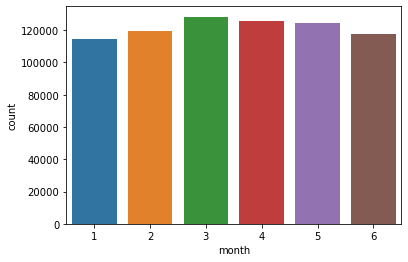

In [24]:
sns.countplot(data.month)
plt.show()

- Although all months have almost similar number of trips, we see that january has the least number of trips and march seems to have the largest number of trips as compared to rest of the months.

# Vendors

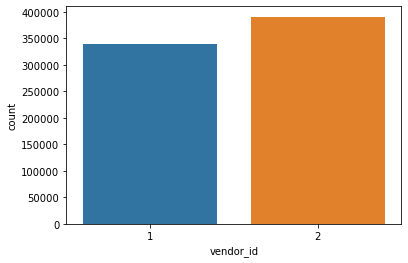

In [25]:
sns.countplot(data.vendor_id)
plt.show()

# Observation:
- There are two vendors in this dataset providing taxi in NYC.
- We see that vendor '2' is more popular in NYC among the two Vendors. Vendor '1' having around 3,40,000 trips while Vender '2' has approximately 4,00,000 trips.

# Distance

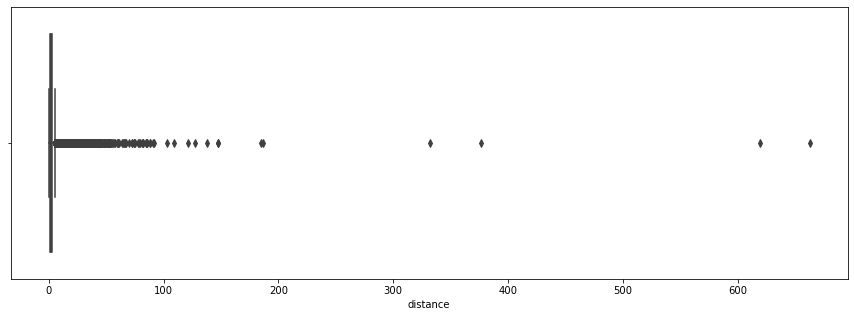

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(data.distance)
plt.show()

In [27]:
data.distance.describe()

count    729320.000000
mean          2.874627
std           4.389583
min           0.000000
25%           0.848827
50%           1.532694
75%           2.849134
max         662.814558
Name: distance, dtype: float64

# Observations:

1. Mean is approximately 3 kms and standard deviation is approximately 4.4, so we can say that maximum number of trips and within 1-8 kms range.
2. We see that there are a few trips which covered a distance of more than 100 kms.
3. There are trips with 0 kms of distance as well.

In [28]:
data[data.distance == 0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,pickup_hour,month,distance,speed
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,240,1,11,6,0.0,0.0
327,id0786923,2,2016-03-26 13:34:38,2016-03-26 13:37:17,1,-73.996323,40.753460,-73.996323,40.753460,N,159,5,13,3,0.0,0.0
795,id2323213,2,2016-06-13 16:49:52,2016-06-13 17:04:49,5,-73.967171,40.763500,-73.967171,40.763500,N,897,0,16,6,0.0,0.0
1176,id3235868,1,2016-02-29 21:39:52,2016-02-29 21:44:08,1,-73.995232,40.744038,-73.995232,40.744038,N,256,0,21,2,0.0,0.0
1257,id1865738,2,2016-03-13 11:38:36,2016-03-13 12:00:46,2,-73.912781,40.804428,-73.912781,40.804428,N,1330,6,11,3,0.0,0.0


In [29]:
print('{}'.format(data.distance[data.distance==0].count()))

2900


- We see that there are a total of 2900 trips which have travel distance of 0 kms.

1. Software error might have occured and the distance wasn't recorded.
2. Customers might have canceled the trip midway.
3. Driver could have canceled the trip for some reason.

- we can't replace or impute these missing values as there will be a mismatch with their drop location values.

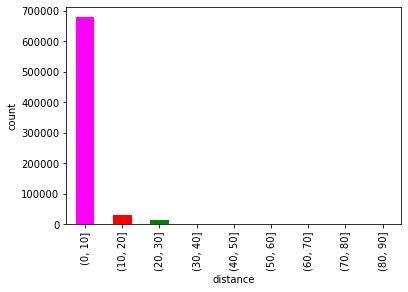

In [30]:
data.distance.groupby(pd.cut(data.distance, np.arange(0,100,10))).count().plot(kind= 'bar', color= ['magenta', 'red', 'green'])
plt.ylabel('count')
plt.show()

# Observations:

1. Maximum number of trips are within the distance of 10 kms.
2. A very few number of trips have distances between 10-30 kms.
3. The trips covering the distance of 30-100 kms are negligible as compared to the range of distances between 1-30 kms.

# Speed

In [31]:
data.speed.describe()

count    729320.000000
mean         11.390460
std          10.759022
min           0.000000
25%           5.740942
50%           9.587753
75%          14.566413
max        4242.849140
Name: speed, dtype: float64

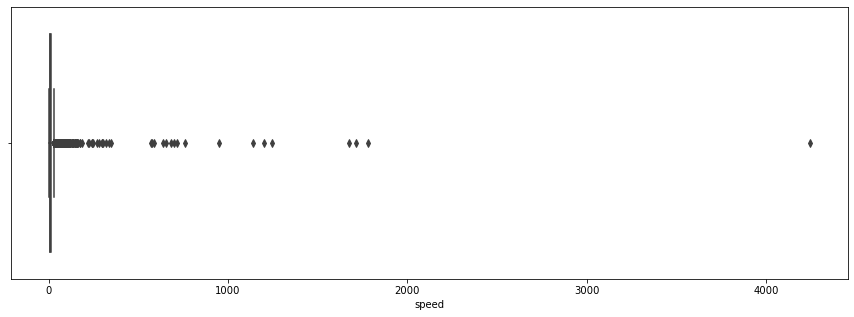

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(data.speed)
plt.show()

- There are trips which were done a speed of more than 200km/h which is highly unlikely and fall in the outlier category.

- the speed limit in NYC is 65mph i.e., 105km/h so we have to ignore those values.

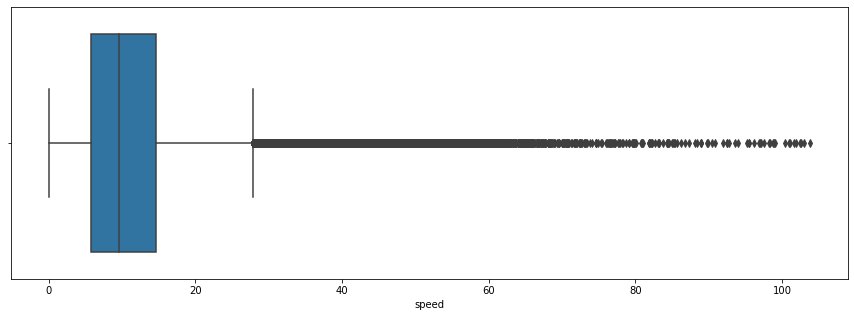

In [33]:
data= data[data.speed<= 105]
plt.figure(figsize=(15,5))
sns.boxplot(data.speed)
plt.show()

# Observations:
1. Maximun number of trips show speed of 0-20km/h
2. Since the speed limit in NYC is 105km/h so we can not ignore values above 30km/h.

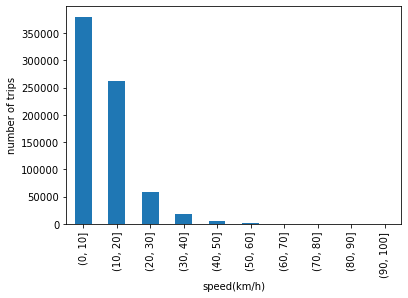

In [34]:
data.speed.groupby(pd.cut(data.speed, np.arange(0,105,10))).count().plot(kind='bar')
plt.xlabel('speed(km/h)')
plt.ylabel('number of trips')
plt.show()

- As we can see, maximum number of trips had a speed within the range of 0-10km/h and 10-20km/h.
- There is barely any taxi trip with speed more than 60km/h.

# Trip duration

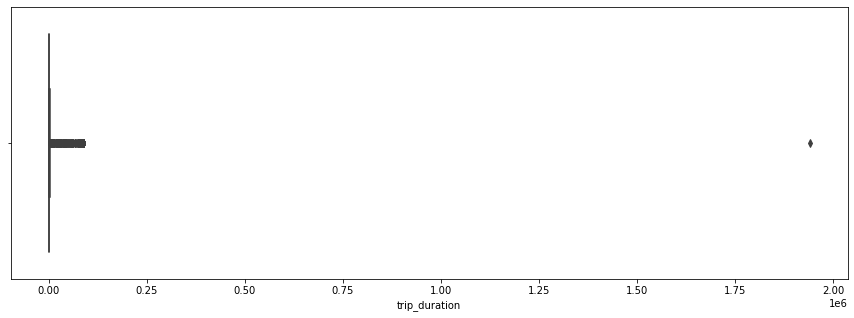

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(data.trip_duration)
plt.show()

- We see that there was a trip that was nearly as long as 2,000,000 seconds i.e., for more than 500 days. This is highly unlikely and clearly an outlier so we'll ignore this value.

In [36]:
data = data[data.trip_duration <= 500000]

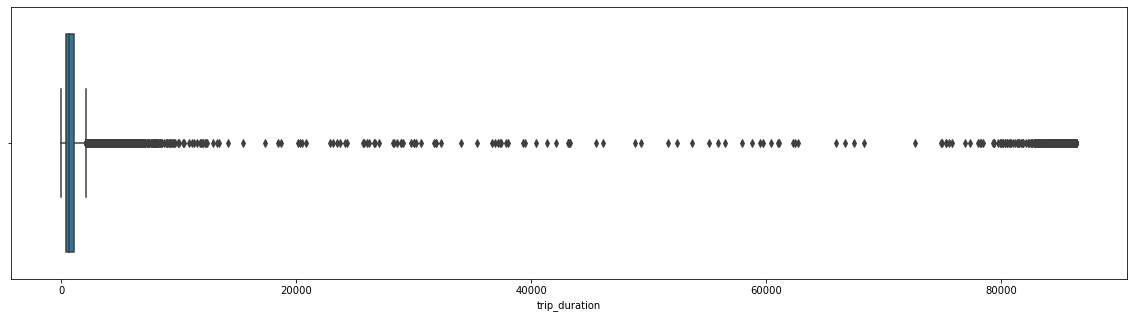

In [37]:
plt.figure(figsize=(20,5))
sns.boxplot(data.trip_duration)
plt.show()

In [38]:
data.trip_duration.describe()

count    729248.000000
mean        949.639104
std        3127.665623
min           1.000000
25%         397.000000
50%         663.000000
75%        1075.000000
max       86391.000000
Name: trip_duration, dtype: float64

# In hours

In [39]:
data.trip_duration.groupby(pd.cut(data.trip_duration, np.arange(0, max(data.trip_duration), 3600))).count()

trip_duration
(0, 3600]         723187
(3600, 7200]        4970
(7200, 10800]         61
(10800, 14400]        15
(14400, 18000]         2
(18000, 21600]         6
(21600, 25200]         6
(25200, 28800]        10
(28800, 32400]        12
(32400, 36000]         2
(36000, 39600]         9
(39600, 43200]         4
(43200, 46800]         4
(46800, 50400]         2
(50400, 54000]         3
(54000, 57600]         3
(57600, 61200]         7
(61200, 64800]         3
(64800, 68400]         4
(68400, 72000]         0
(72000, 75600]         6
(75600, 79200]         7
(79200, 82800]        34
Name: trip_duration, dtype: int64

# Observations:
1. Maximum number of trips are completed within 1 hour.
2. There are 34 trips that took 23 hours to complete.
3. Number of trips increase for the interval of 8-9 hours.

# In minutes

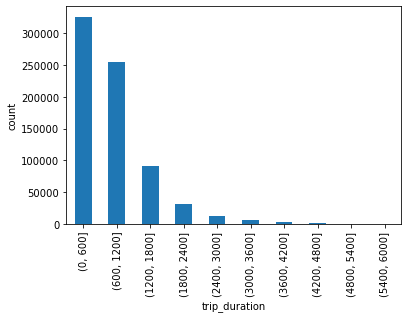

In [70]:
data.trip_duration.groupby(pd.cut(data.trip_duration, np.arange(0, 6600, 600))).count().plot(kind='bar')
plt.ylabel('count')
plt.show()

# Observations:
1. We see that maximum number of trips were completed within 10 minutes.
2. There are very few trip that took 80 minutes.

# Store and fwd Flag

In [41]:
dummy = pd.get_dummies(data.store_and_fwd_flag, prefix = 'flag')
dummy.drop(dummy.columns[0], axis=1)
data= pd.concat([data, dummy], axis= 1)

In [42]:
data.flag_Y.value_counts(normalize= True)

0    0.994461
1    0.005539
Name: flag_Y, dtype: float64

- we observe that only 0.55% of trips had trip details stored beforehand and the majority of trips didn't store trip details.

In [43]:
data.vendor_id[data.flag_Y==1].value_counts()

1    4039
Name: vendor_id, dtype: int64

In [44]:
data.flag_Y.value_counts()

0    725209
1      4039
Name: flag_Y, dtype: int64

# Observations:
- We observe that all the trips that stored the trip details beforehand were made by vendor '1'.
1. Vendor '2' might have a better technology than vendor '1' to store the data beforehand in case of a signal loss.
2. Vendor '1' might have a poor software which causes them to occasionally loose server connection and therefore, they have to store the trip details before the trip begins.

# Bivariate Analysis

# Distance each hour of the day

- Since we've dealt with outlier values so we will be using mean for bivariate analysis between different variables.

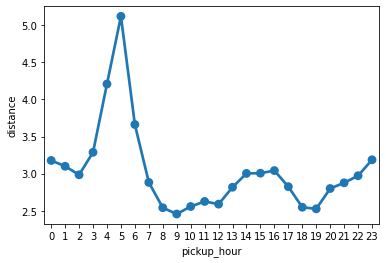

In [45]:
D1 = data.groupby('pickup_hour').distance.mean()
sns.pointplot(D1.index, D1.values)
plt.ylabel('distance')
plt.show()

1. Trip distance is highest during early morning hours, around 5a.m in the morning. People seem to like early morning long rides.
2. Trip distance significantly decreases after 5a.m reaching lowest at around 9a.m. Then stays somewhat same till the evening 7a.m and then starts gradually increasing till the midnight.

# Distance each Weekday

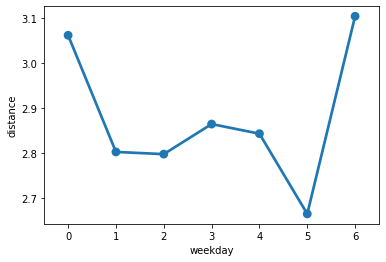

In [46]:
D2 = data.groupby('weekday').distance.mean()
sns.pointplot(D2.index, D2.values)
plt.ylabel('distance')
plt.show()

1. We see that the least distance covered is on saturday and the highest is traveled on sundays.
2. Monday has the second highest travel distance out of all weekdays.
3. The distance significantly decreases on tuesday compared to sunday and monday. It stays about the same till friday.

# Distance each month

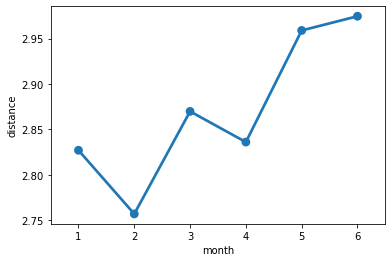

In [47]:
D3 = data.groupby('month').distance.mean()
sns.pointplot(D3.index, D3.values)
plt.ylabel('distance')
plt.show()

1. Least distances are covered during the second month among all the other months.
2. The Maximum distances are covered in the 6th month, followed by the distance in 5th month.

# Distance per Trip duration

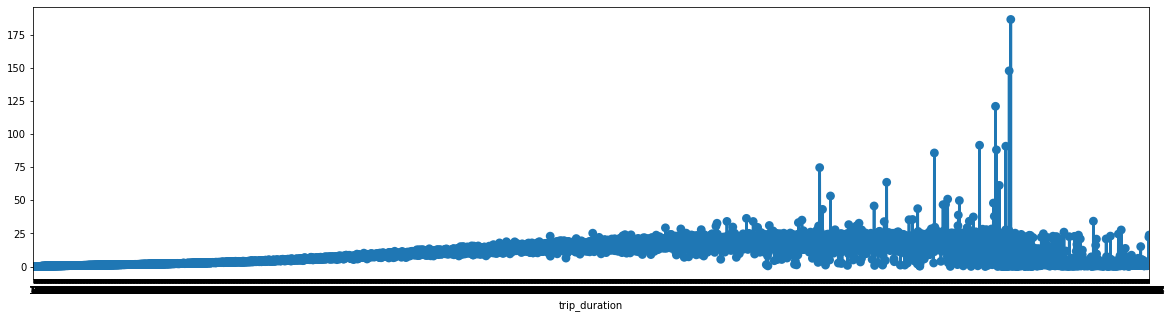

In [48]:
plt.figure(figsize=(20,5))
D4 = data.groupby('trip_duration').distance.mean()
sns.pointplot(D4.index, D4.values)
plt.show()

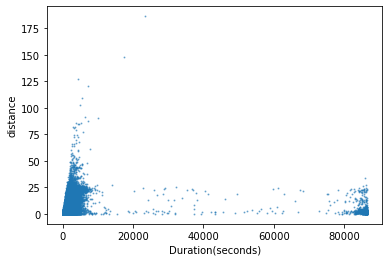

In [49]:
plt.scatter(data.trip_duration, data.distance, s=1, alpha=0.5)
plt.xlabel('Duration(seconds)')
plt.ylabel('distance')
plt.show()

# Observations:
- there are a large number of trips which covered no distance at all and their trip duration is more than 20,000seconds i.e., more than 5 hours. We should focus on the area with less than 10,000 seconds.

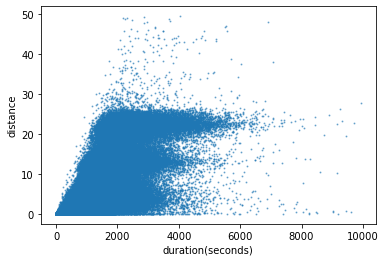

In [50]:
bi_dist = data.loc[(data.trip_duration<10000) & (data.distance< 50)]
plt.scatter(bi_dist.trip_duration, bi_dist.distance, s=1, alpha=0.5)
plt.xlabel('duration(seconds)')
plt.ylabel('distance')
plt.show()

- there are a lot of trips with more than 30 and 60 minutes which cover 0km distance. It rarely happens that passenger keeps sitting in the taxi for more than and hour and travels nowhere.

In [51]:
min= data.loc[(data['distance'] <= 1) & (data['trip_duration'] >= 3600),['distance','trip_duration']].reset_index(drop=True)

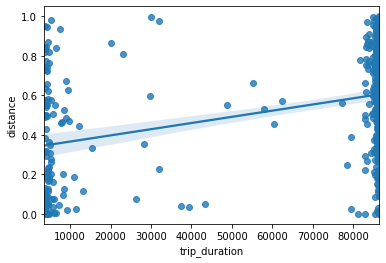

In [52]:
sns.regplot(min.trip_duration, min.distance)
plt.show()

- Although having some linear relationship, still it is not a linear distribution and shows no correlation between the two.
- these values must be removed for better consistency in our dataset.

In [53]:
data= data[~((data['trip_duration'] <=1) & (data['distance']<=3600))]

# Distance per vendor

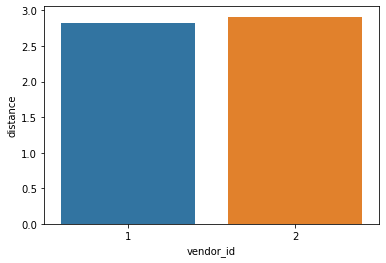

In [54]:
D5 = data.groupby('vendor_id').distance.mean()
sns.barplot(D5.index, D5.values)
plt.ylabel('distance')
plt.show()

- both the vendors show almost the same distance coverage in this dataset.

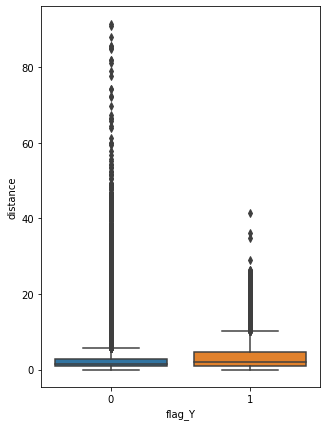

In [55]:
plt.figure(figsize=(5,7))
D6 = data[(data.distance<100)]
sns.boxplot(x='flag_Y', y='distance', data= D6)
plt.show()

# Observations:
- IQR for flag'Y' is much more than that of flag'N'.
- flag'Y' trips consist of very less number of outliers as compared to flag'N'.

# Trip duration per hour 

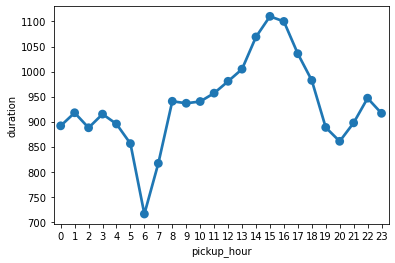

In [56]:
D7 = data.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(D7.index, D7.values)
plt.ylabel('duration')
plt.show()

- Average trip duration is least during early morning hour of 6a.m.
- Trip duration reach its maximum during the pickup hours of 3p.m and 4p.m which might be due to the busy roads in the afternoon.

# Trip duration per weekday

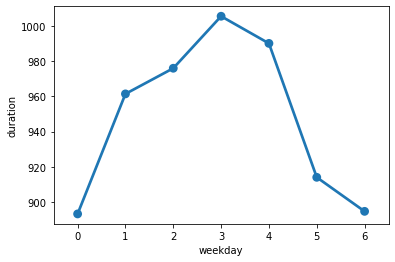

In [57]:
D8= data.groupby('weekday').trip_duration.mean()
sns.pointplot(D8.index, D8.values)
plt.ylabel('duration')
plt.show()

- We see that the longest trip duration occurs on the day of thursday.
- on Monday and Sunday the trip durationns take up almost the same time. This maybe because of less traffic aand least conjusted roads during these days.

# Trip duration per month

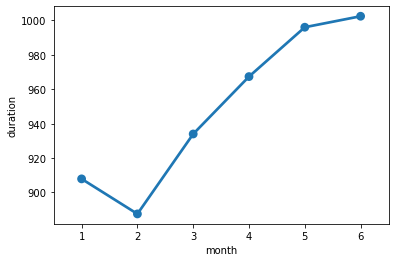

In [58]:
D9 = data.groupby('month').trip_duration.mean()
sns.pointplot(D9.index, D9.values)
plt.ylabel('duration')
plt.show()

- Trip durations in the second month is the least among all other months.
- trip durations then rise gradually and significantly after the 2nd month, reaching its peak during the 6th month of the dataset.

# Trip duration per vendor

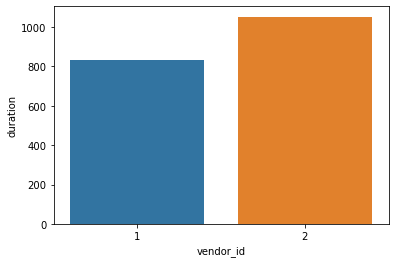

In [59]:
D10 = data.groupby('vendor_id').trip_duration.mean()
sns.barplot(D10.index, D10.values)
plt.ylabel('duration')
plt.show()

- Although vendor'1' has less trip duration time than vendor'2', there isn't much difference, as Vendor'1' takes about 14 minutes and Vendor'2' shows the time of approx 17 minutes.

# Trip duration v/s Store and fwd flag

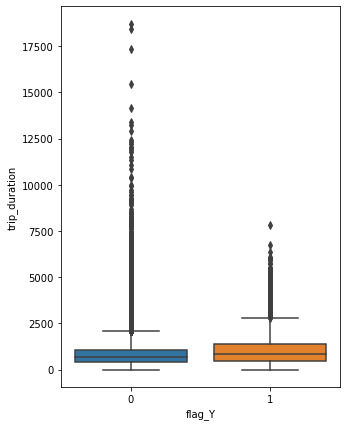

In [60]:
plt.figure(figsize=(5,7))
pl = data[(data.trip_duration<20000)]
sns.boxplot(x='flag_Y', y='trip_duration', data= pl)
plt.show()

- IQR is more for trips with flag value '1'.
- Median is almost the same for both flag values.
- We see that the trip duration is also less than half for flag'Y' compared to that of flag'N'.
- Outliers are almost half for the trips where flag was set compared to flag'N' trips.

# Average Speed per Hour

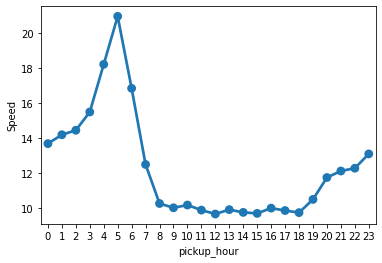

In [61]:
s1 = data.groupby('pickup_hour').speed.mean()
sns.pointplot(s1.index, s1.values)
plt.ylabel('Speed')
plt.show()

- We see that trip speed tends to increase gradually in the late evening after 6p.m till the night falls and keeps increasing till early morning hours.
- Speed reaches its peak during 5a.m in the morning and decreases significantly till 8a.m.
- speed tend to remain approximately the same from 8a.m to 6p.m.

# Average speed per weekday

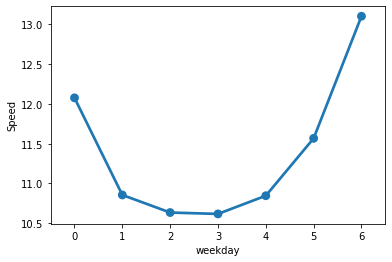

In [62]:
s2= data.groupby('weekday').speed.mean()
sns.pointplot(s2.index, s2.values)
plt.ylabel('Speed')
plt.show()

- The taxi speed is at its peak during the weekend which is quite obvious as there less traffic on  sundays.
- Speed also seem to be high on Monday which might be due to people rushing to their work or due to the outstation customers in a hurry for their early morning jobs.

# speed v/s month

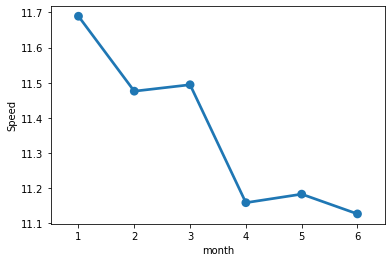

In [63]:
s3= data.groupby('month').speed.mean()
sns.pointplot(s3.index, s3.values)
plt.ylabel('Speed')
plt.show()

- Trip speed stays at its peak in the first month among all the other months.
- Speed seems to be the lowest in the last month as it decreases gradually begining from the first month.
- Second and third month have almost similar speed output. Same is the case in 4th and 5th month.

# Passenger counts v/s Vendors

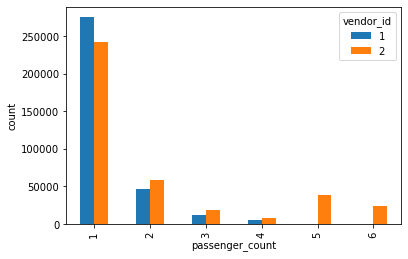

In [64]:
data.groupby('passenger_count').vendor_id.value_counts().reset_index(name='count').pivot('passenger_count', 'vendor_id', 'count').plot(kind='bar')
plt.ylabel('count')
plt.show()

# observations:
- It seems that vendor '1' has more popularity in carrying less number of passengers as compared to vendor'2'.
- As the number of passengers increases we notice that vendor 2 seems to have more trips than vendor'1'.
- this points to the fact that vendor'2' must have bigger cars that can carry more passengers as compared to vendor'1'.
- This further explains the fact that why vendor'2' is more popular in NYC among the two vendors as we found out earlier.

# Correlation

In [65]:
num = data.select_dtypes(include= ['int64','float64', 'int64'])
num.dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
weekday                int64
pickup_hour            int64
month                  int64
distance             float64
speed                float64
dtype: object

In [66]:
num.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,weekday,pickup_hour,month,distance,speed
vendor_id,1.000000,0.286475,0.008048,0.003520,0.001803,0.005371,0.035221,0.000777,0.009773,-0.005388,0.009681,0.004468
passenger_count,0.286475,1.000000,0.001142,-0.004489,-0.000125,-0.003628,0.016515,0.025781,0.009848,-0.001526,0.010103,-0.001557
pickup_longitude,0.008048,0.001142,1.000000,0.042723,0.786195,0.123953,0.041887,-0.016077,0.011010,0.004097,0.306726,0.220361
pickup_latitude,0.003520,-0.004489,0.042723,1.000000,0.141149,0.493321,-0.049580,-0.033080,0.012429,-0.000890,-0.285675,-0.129013
dropoff_longitude,0.001803,-0.000125,0.786195,0.141149,1.000000,0.168366,0.026011,-0.001463,-0.022220,0.004265,0.201877,0.189888
dropoff_latitude,0.005371,-0.003628,0.123953,0.493321,0.168366,1.000000,-0.037525,-0.023207,0.015124,-0.000876,-0.154650,-0.029141
trip_duration,0.035221,0.016515,0.041887,-0.049580,0.026011,-0.037525,1.000000,-0.001947,0.005481,0.012866,0.155119,-0.017680
weekday,0.000777,0.025781,-0.016077,-0.033080,-0.001463,-0.023207,-0.001947,1.000000,-0.082072,-0.013640,-0.002080,0.041386
pickup_hour,0.009773,0.009848,0.011010,0.012429,-0.022220,0.015124,0.005481,-0.082072,1.000000,-0.003307,-0.019756,-0.090835
month,-0.005388,-0.001526,0.004097,-0.000890,0.004265,-0.000876,0.012866,-0.013640,-0.003307,1.000000,0.015078,-0.024024


In [67]:
c= num.corr().abs()
s= c.unstack()
so = s.sort_values(kind= 'quicksort', ascending = False)
so= pd.DataFrame(so, columns= ['Pearson correlation'])

In [68]:
so[so['Pearson correlation']<1].head(20)

,,Pearson correlation
dropoff_longitude,pickup_longitude,0.786195
pickup_longitude,dropoff_longitude,0.786195
speed,distance,0.683403
distance,speed,0.683403
dropoff_latitude,pickup_latitude,0.493321
pickup_latitude,dropoff_latitude,0.493321
pickup_longitude,distance,0.306726
distance,pickup_longitude,0.306726
vendor_id,passenger_count,0.286475
passenger_count,vendor_id,0.286475


- Here we observe that there is a strong correlation between pickup longitude nd drop off longitude.
- Speed and distance have some good correlation but it comes in the moderate category and same is the case for correlation between pickup and drop off latitude.
- Other than these variables we see that there is very weak correlation between rest of the variables.

# Heatmap

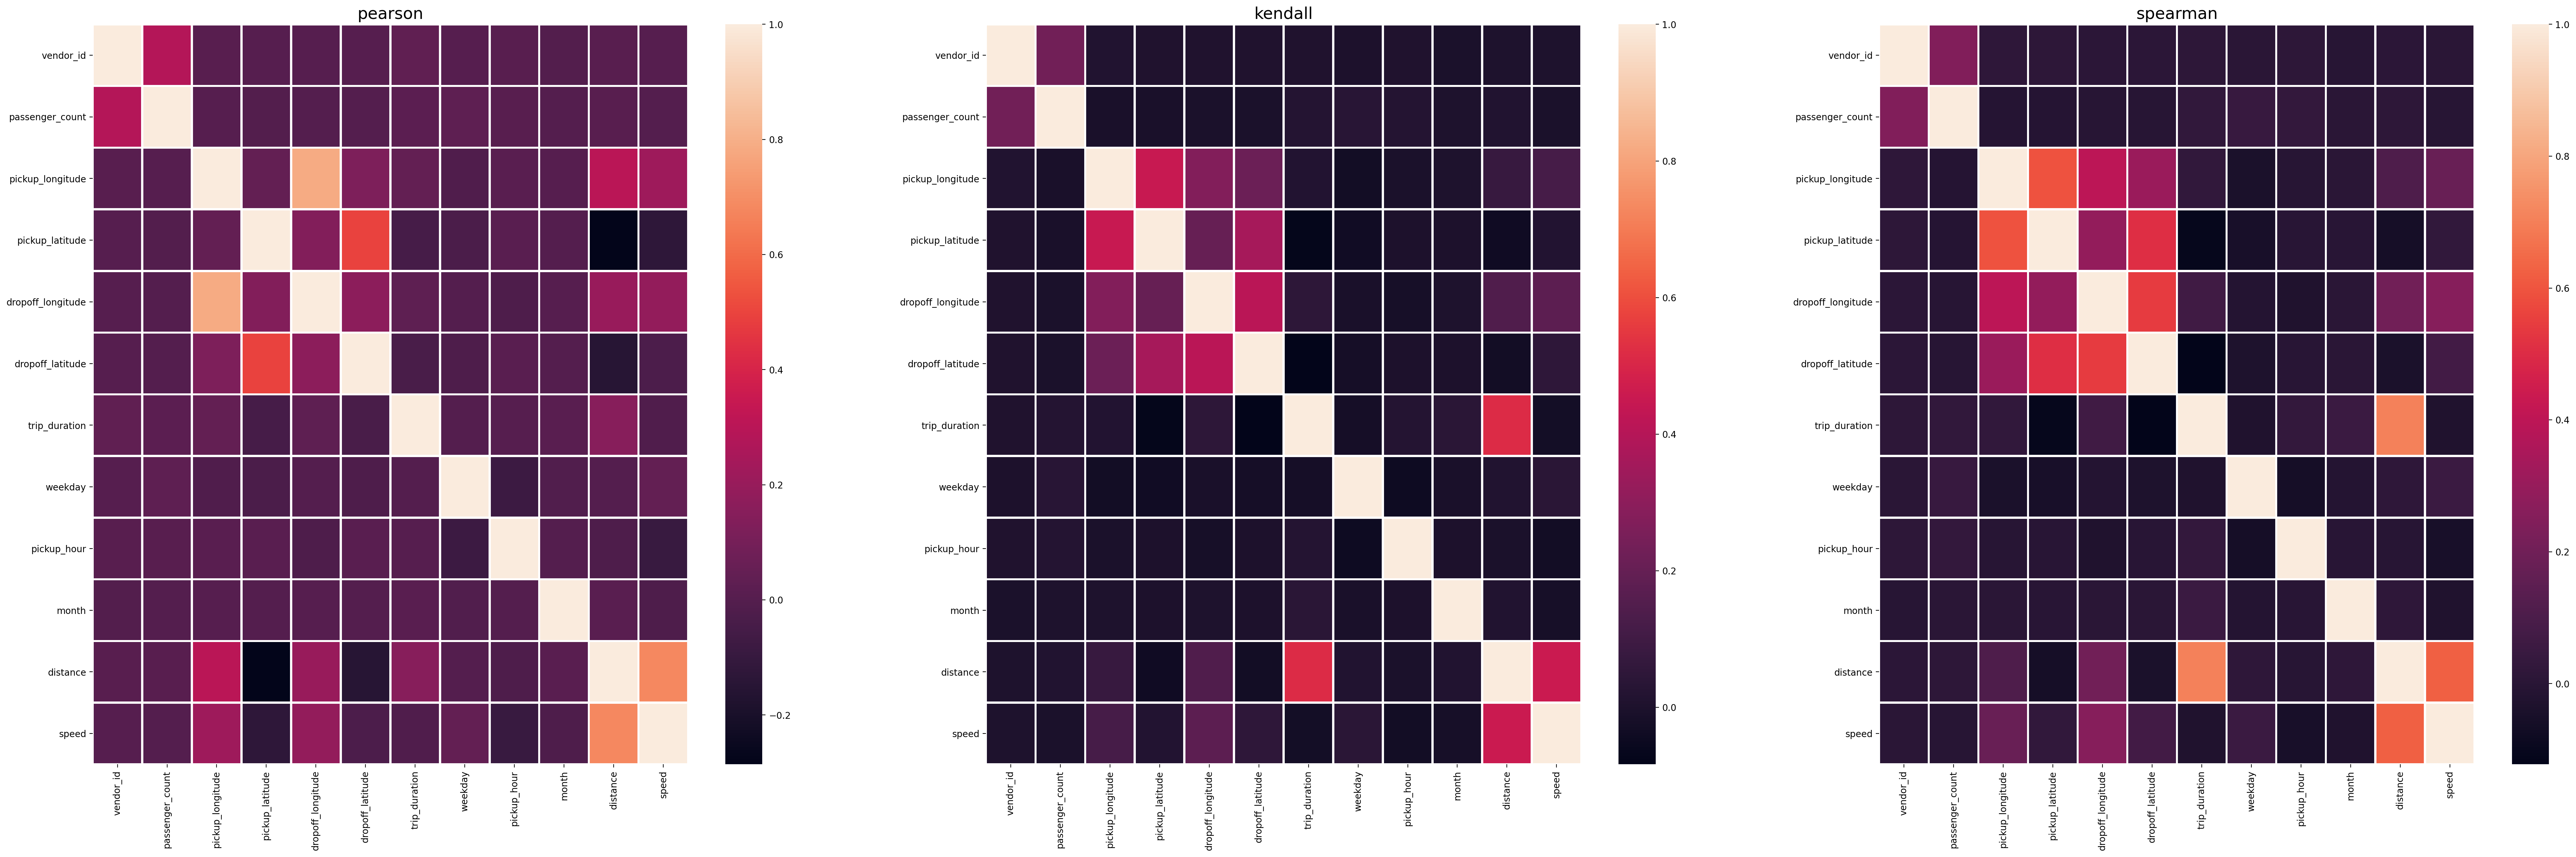

In [69]:
# plotting heatmap with all 3 methods for numerical variables
plt.figure(figsize= (50,15), dpi=200)
for j,i in enumerate(['pearson', 'kendall', 'spearman']):
    plt.subplot(1,3,j+1)
    correlation= num.corr(method= i)
    sns.heatmap(correlation, linewidth=2)
    plt.title(i, fontsize= 18)

# Observations:
1. In any of the heatmap we see that some of the variables show slight correlation but hardly any variable shows correlation above 0.7 or 0.8.
2. Maximum number of Variables show No correlation and in Pearson correlation Heatmap, some even show negative Correlation.